In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
import numpy as np
import xgboost as xgb
from model.dataloader import DataLoader
from model.estimator import get_metrics



In [2]:
cols = ['account_days_in_dc_12_24m', 'account_days_in_rem_12_24m', 'age',
       'avg_payment_span_0_12m', 'num_active_div_by_paid_inv_0_12m',
       'num_active_inv', 'num_arch_dc_0_12m', 'num_arch_dc_12_24m',
       'num_arch_ok_0_12m', 'num_arch_rem_0_12m', 'num_unpaid_bills',
       'status_last_archived_0_24m', 'status_2nd_last_archived_0_24m',
       'status_3rd_last_archived_0_24m', 'status_max_archived_0_6_months',
       'status_max_archived_0_12_months', 'time_hours', 'has_paid',
       'x0_Automotive Products', 'x0_Children Products', 'x0_Clothing & Shoes',
       'x0_Electronics', 'x0_Entertainment', 'x0_Erotic Materials',
       'x0_Food & Beverage', 'x0_Health & Beauty', 'x0_Home & Garden',
       'x0_Intangible products', 'x0_Jewelry & Accessories',
       'x0_Leisure, Sport & Hobby', 'x1_F', 'x1_F+L', 'x1_F1+L', 'x1_L',
       'x1_Nick', 'x1_no_match', 'merchant_category_freq_encode']

In [3]:
dl = DataLoader()
X_train, X_test, y_train, y_test = dl.get_test_train_data()



## LogisticRegression

ROC_AUC:   0.901
Gini:      0.801
F1_score:  0.227
Log_loss:  0.918
Classification_report: 
               precision    recall  f1-score   support

           0       0.98      0.99      0.99     11759
           1       0.36      0.17      0.23       283

    accuracy                           0.97     12042
   macro avg       0.67      0.58      0.61     12042
weighted avg       0.97      0.97      0.97     12042



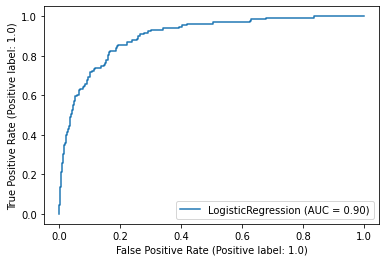

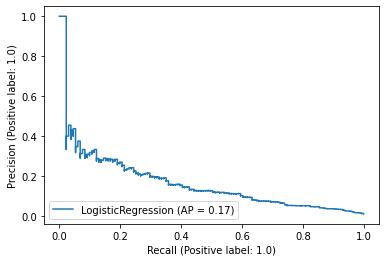

In [6]:
model = LogisticRegression(C=10, penalty='l2')
get_metrics(model, X_train[cols], X_test[cols], y_train, y_test, 0.95)

## XGBboost

ROC_AUC:   0.892
Gini:      0.784
F1_score:  0.063
Log_loss:  0.513
Classification_report: 
               precision    recall  f1-score   support

           0       1.00      0.99      0.99     11982
           1       0.05      0.10      0.06        60

    accuracy                           0.99     12042
   macro avg       0.52      0.54      0.53     12042
weighted avg       0.99      0.99      0.99     12042



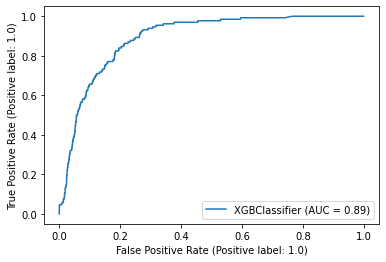

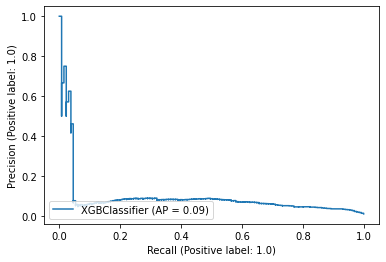

In [10]:
params = {"n_estimators": 400,
        "max_depth": 20,
        "learning_rate": 0.01,
        "n_jobs": 1,
        "reg_alpha": 0
         }
model = xgb.XGBClassifier(**params)
get_metrics(model, X_train[cols], X_test[cols], y_train, y_test, 0.95)